# ALGORITHMS FOR UNSUPERVISED LEARNING

* ALGORITHMS USED FOR UNSUPERVISED LEARNING :-
* 1. Clustering.
* 2. Association.
* 3. Dimensionality Reduction.

<b> CLUSTERING <b>
* Types Of Clustering are :-
* 1. centroid ( K-Means)
* 2. Fuzzy
* 3. Hierarichal ( Multivarient Normal Distribution)
* 4. Density Based ( DB SCAN , OPTICS)
* 5. Distribution
* 6. Mean Shift
* 7. Spectral
* 8. Agglomerative Hierarchical
* 9. Gaussian Mixture Model
* 10. Biclustering

<b> ASSOCIATION <b>
*  Apriori Algorithm
*  Frequency Pattern Growth Algorithm
    
<b> Dimensionality Reduction <b>
* PCA ( Principal Component Analysis Algorithm )
* LDA ( Linear Discriminant Analysis )
8 GDA ( Generalized Discriminent Analysis )

### K-MEANS CLUSTERING

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time

In [86]:
n_colors = 64
china = load_sample_image("china.jpg")

In [96]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1])
china = np.array(china, dtype=np.float64) / 255
china.shape

(427, 640, 3)

In [99]:
w, h, d = original_shape = tuple(china.shape)
assert d == 3
image_array = np.reshape(china, (w * h, d))

In [89]:
#t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
#print(f"done in {time() - t0:0.3f}s.")

In [107]:
labels = kmeans.predict(image_array)

In [105]:
codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
print("Predicting color indices on the full image (random)")
# t0 = time()
labels_random = pairwise_distances_argmin(codebook_random, image_array, axis=0)
# print(f"done in {time() - t0:0.3f}s.")

Predicting color indices on the full image (random)


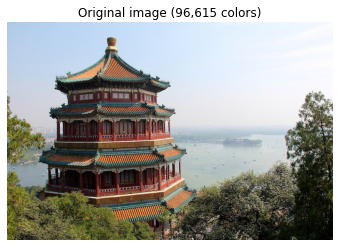

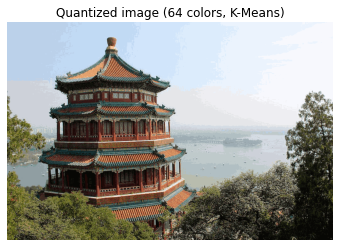

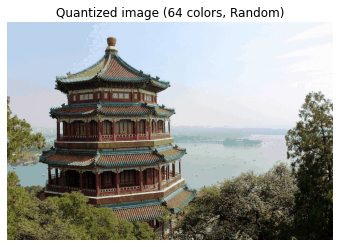

In [95]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(china)

plt.figure(2)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, K-Means)")
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

plt.figure(3)
plt.clf()
plt.axis("off")
plt.title(f"Quantized image ({n_colors} colors, Random)")
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()

# HIERARCHICAL CLUSTERING

In [108]:
import numpy as nm  
import matplotlib.pyplot as mtp  
import pandas as pd  

In [110]:
data = pd.read_csv(r"C:\Users\91891\Downloads\archive (8)\Mall_Customers_dataset.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [112]:
x = data.iloc[:, [3, 4]].values  

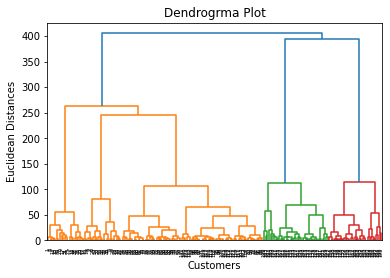

In [114]:
#Finding the optimal number of clusters using the dendrogram  
import scipy.cluster.hierarchy as shc  
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
mtp.title("Dendrogrma Plot")  
mtp.ylabel("Euclidean Distances")  
mtp.xlabel("Customers")  
mtp.show()  

# he linkage function is used to define the distance between two clusters, so here we have passed the x(matrix of features)
# and method "ward," the popular method of linkage in hierarchical clustering.

In [120]:
# In the above diagram, we have shown the vertical distances that are not cutting their horizontal bars. As we can visualize,
# the 4th distance is looking the maximum, so according to this, the number of clusters will be 5(the vertical lines in this
# range)

#training the hierarchical model on dataset 

from sklearn.cluster import AgglomerativeClustering  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)  

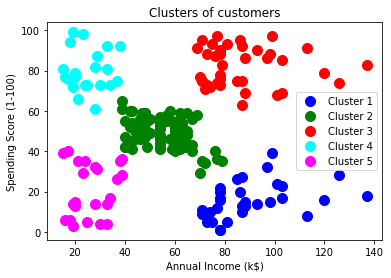

In [117]:
#visulaizing the clusters  

mtp.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')  
mtp.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 100, c = 'green', label = 'Cluster 2')  
mtp.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 100, c = 'red', label = 'Cluster 3')  
mtp.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
mtp.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')  
mtp.title('Clusters of customers')  
mtp.xlabel('Annual Income (k$)')  
mtp.ylabel('Spending Score (1-100)')  
mtp.legend()  
mtp.show()  